In [3]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=True)
backend.name

qiskit_runtime_service.__init__:INFO:2024-03-28 13:19:23,342: Default instance: quantum-explorer/group-7/project-2


'ibmq_qasm_simulator'

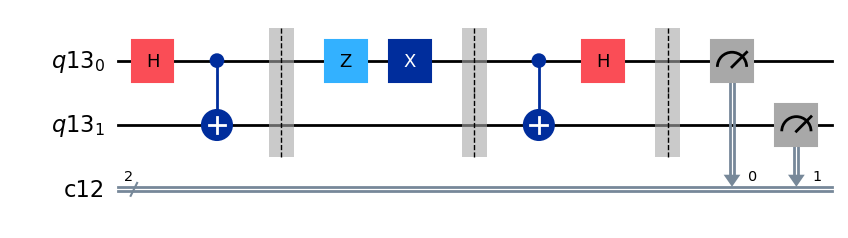

In [20]:
q_reg=QuantumRegister(2)
c_reg=ClassicalRegister(2)
q_ckt = QuantumCircuit(q_reg,c_reg)


# Creating entangle pair  between sender and receiver
q_ckt.h(0)
q_ckt.cx(0,1)
q_ckt.barrier()

# Encoding classical bit say 11
q_ckt.z(0)
q_ckt.x(0)

q_ckt.barrier()


# Doing basis measurement using both pair of entangle state alice and bob classical bit say 11
q_ckt.cx(0,1)
q_ckt.h(0)
q_ckt.barrier()

# Final measurement
q_ckt.measure(q_reg,c_reg)

q_ckt.draw()

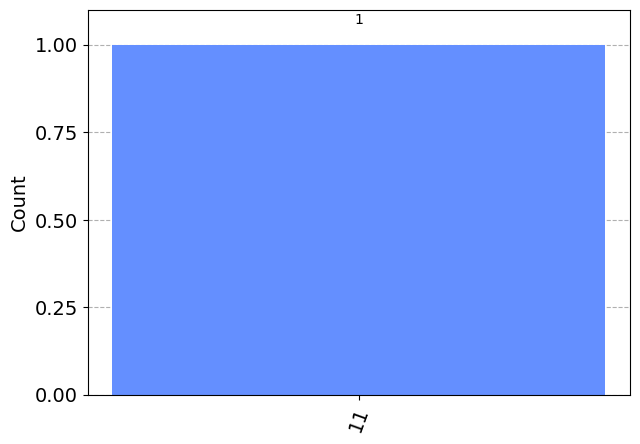

In [21]:
job=backend.run(q_ckt, shots=1)
count=job.result().get_counts()
plot_histogram(count)

In [22]:
# we have successfully encoded the information 11 classical bit
# 00 use I gate alice side
# 01 use x gate alice side
# 10 use z gate alice side
# 11 use zx gate alice side